## Kriging with Varying Correlation-p {#sec-num-spot-correlation-p}


This chapter illustrates the difference between Kriging models with varying p. The difference is illustrated with the help of the `spotPython` package. 

## Example: `Spot` Surrogate and the 2-dim Sphere Function


In [1]:
import numpy as np
from math import inf
from spotPython.fun.objectivefunctions import analytical
from spotPython.spot import spot
from spotPython.utils.init import fun_control_init, surrogate_control_init
PREFIX="003"

Seed set to 123


### The Objective Function: 2-dim Sphere

* The `spotPython` package provides several classes of objective functions.
* We will use an analytical objective function, i.e., a function that can be described by a (closed) formula:
   $$f(x, y) = x^2 + y^2$$
* The size of the `lower` bound vector determines the problem dimension.
* Here we will use `np.array([-1, -1])`, i.e., a two-dim function.


In [2]:
fun = analytical().fun_sphere
fun_control = fun_control_init(PREFIX=PREFIX,
                               lower = np.array([-1, -1]),
                               upper = np.array([1, 1]))

Seed set to 123


Created spot_tensorboard_path: runs/spot_logs/003_p040025_2024-01-10_22-26-24 for SummaryWriter()


* Although the default `spot` surrogate model is an isotropic Kriging model, we will explicitly set the `theta` parameter to a value of `1` for both dimensions. This is done to illustrate the difference between isotropic and anisotropic Kriging models.


In [3]:
surrogate_control=surrogate_control_init(n_p=1,
                                         p_val=2.0,)

In [4]:
spot_2 = spot.Spot(fun=fun,
                   fun_control=fun_control,
                   surrogate_control=surrogate_control)

spot_2.run()

spotPython tuning: 1.801603872454505e-05 [#######---] 73.33% 


spotPython tuning: 1.801603872454505e-05 [########--] 80.00% 


spotPython tuning: 1.801603872454505e-05 [#########-] 86.67% 


spotPython tuning: 1.801603872454505e-05 [#########-] 93.33% 


spotPython tuning: 1.801603872454505e-05 [##########] 100.00% Done...



### Results


In [5]:
spot_2.print_results()

min y: 1.801603872454505e-05
x0: 0.0019077911677074135
x1: 0.003791618596979743


[['x0', 0.0019077911677074135], ['x1', 0.003791618596979743]]

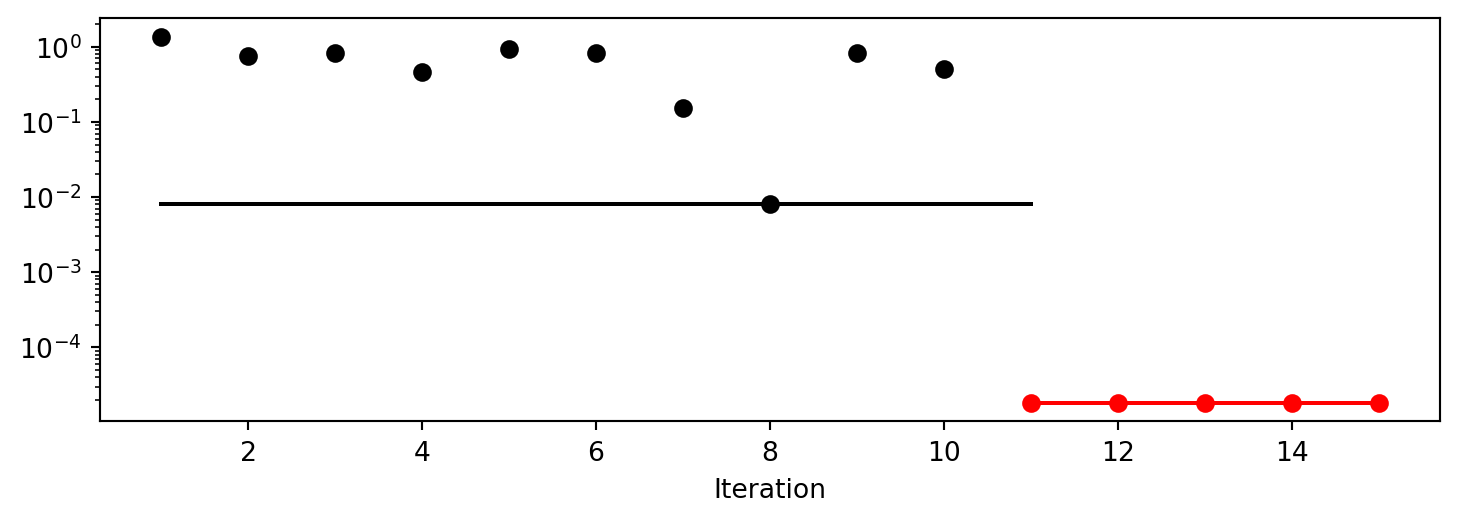

In [6]:
spot_2.plot_progress(log_y=True)

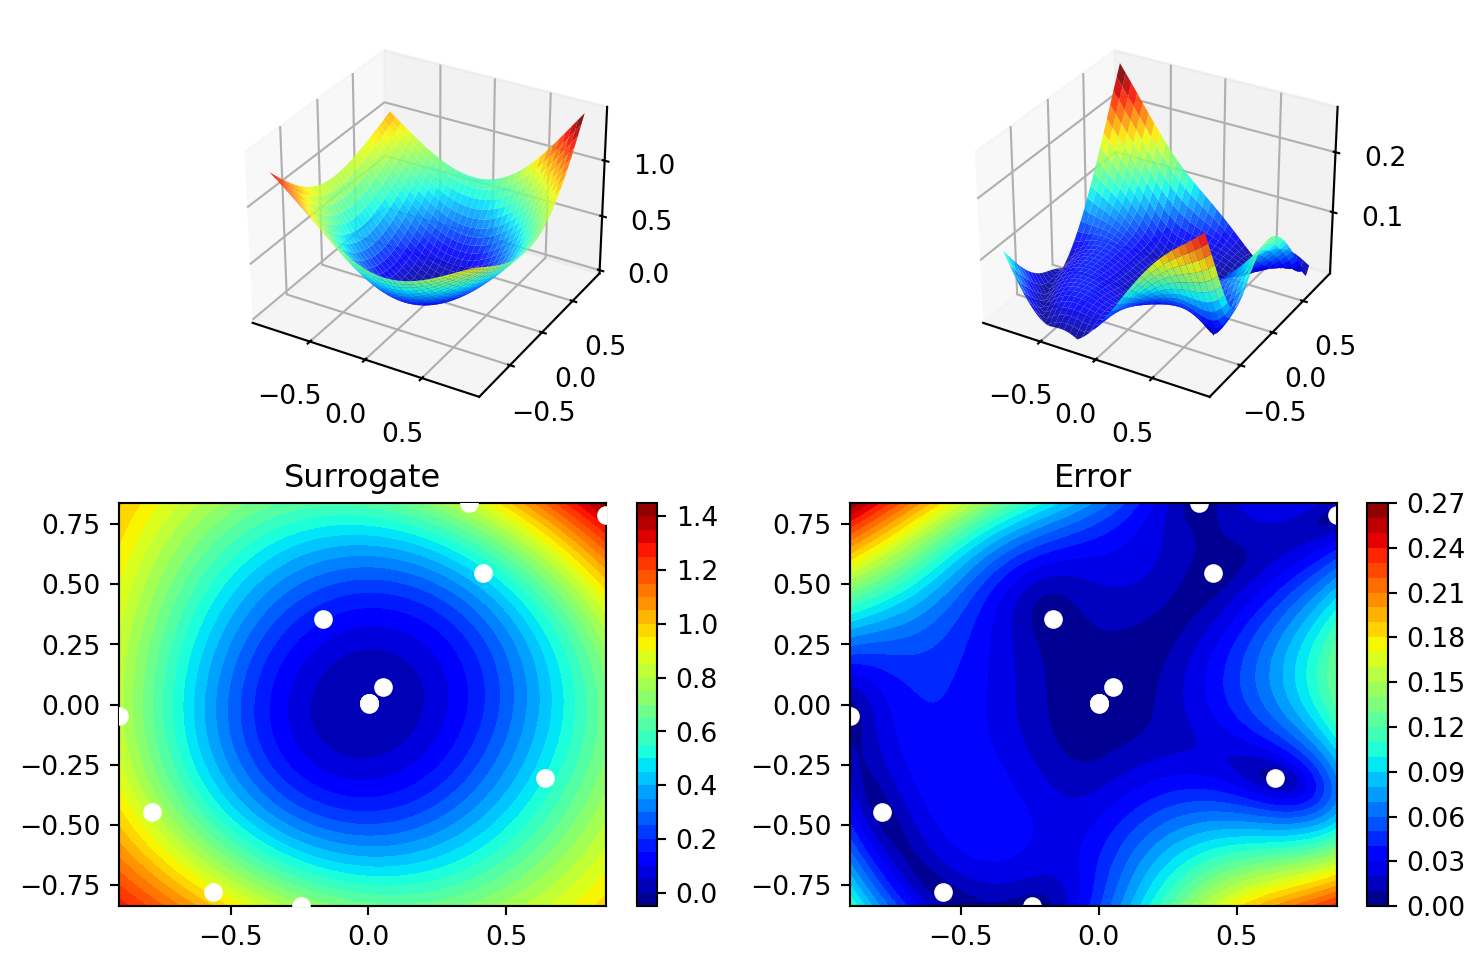

In [7]:
spot_2.surrogate.plot()

## Example With Modified p

* We can use set `p` to a value other than `2` to obtain a different Kriging model.


In [8]:
surrogate_control = surrogate_control_init(n_p=1,
                                           p_val=1.0)
spot_2_p1= spot.Spot(fun=fun,
                    fun_control=fun_control,
                    surrogate_control=surrogate_control)
spot_2_p1.run()

spotPython tuning: 1.801603872454505e-05 [#######---] 73.33% 


spotPython tuning: 1.801603872454505e-05 [########--] 80.00% 


spotPython tuning: 1.801603872454505e-05 [#########-] 86.67% 


spotPython tuning: 1.801603872454505e-05 [#########-] 93.33% 


spotPython tuning: 1.801603872454505e-05 [##########] 100.00% Done...



* The search progress of the optimization with the anisotropic model can be visualized:


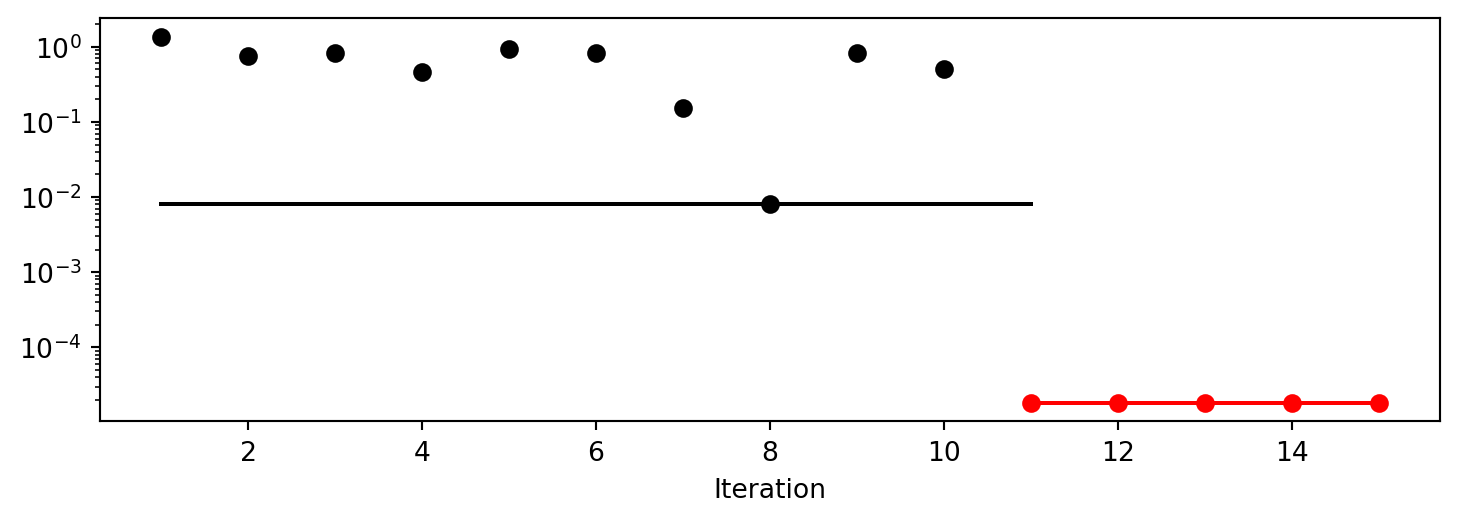

In [9]:
spot_2_p1.plot_progress(log_y=True)

In [10]:
spot_2_p1.print_results()

min y: 1.801603872454505e-05
x0: 0.0019077911677074135
x1: 0.003791618596979743


[['x0', 0.0019077911677074135], ['x1', 0.003791618596979743]]

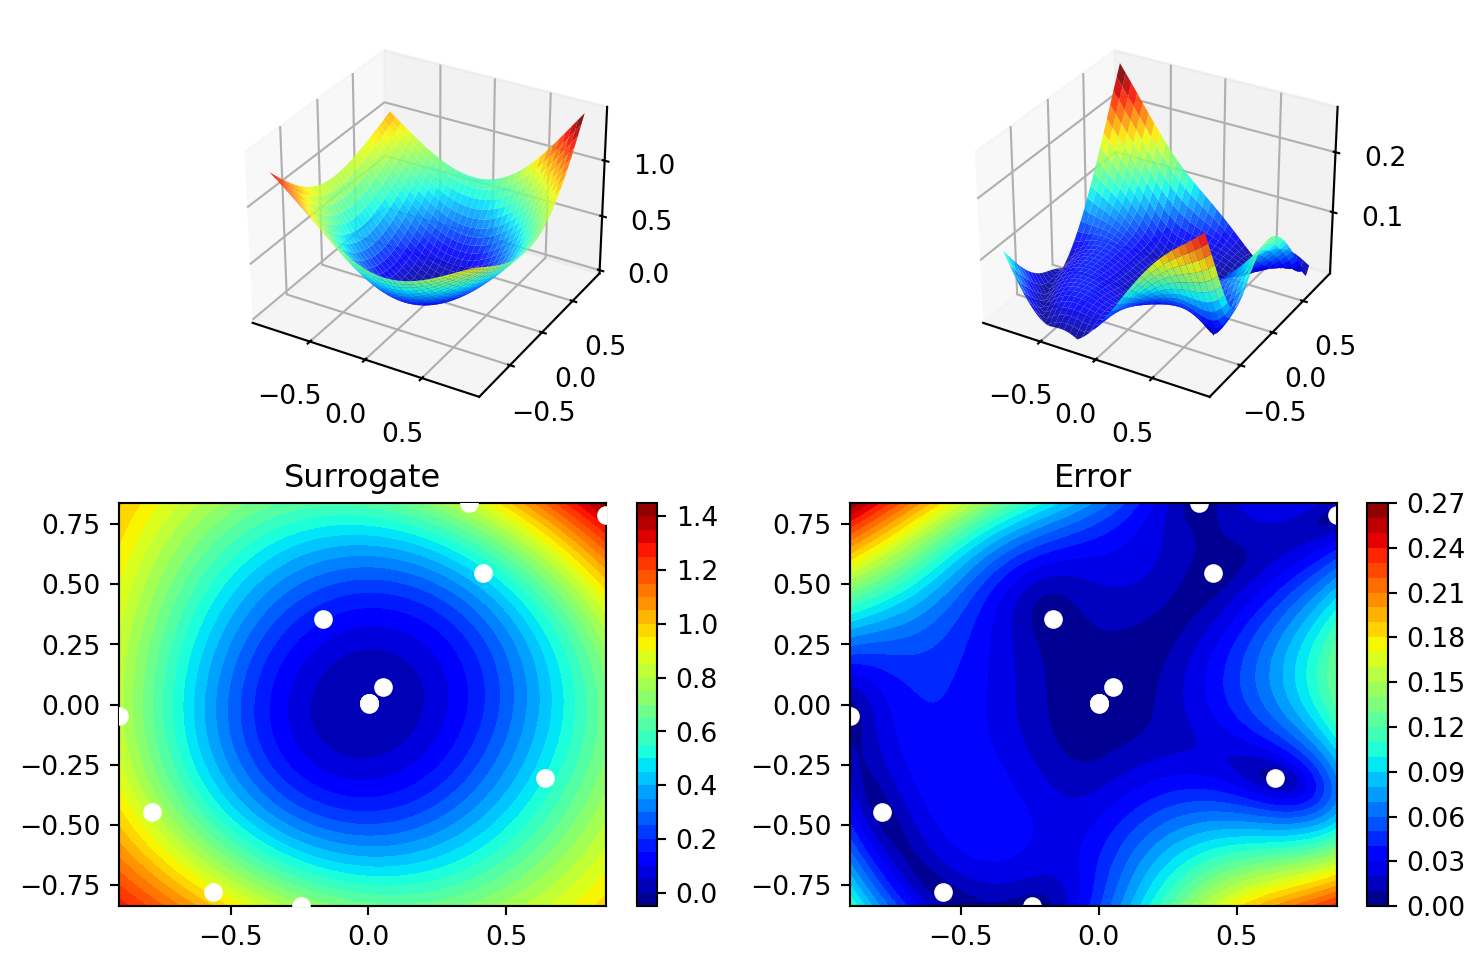

In [11]:
spot_2_p1.surrogate.plot()

### Taking a Look at the `p` Values

#### `p` Values from the `spot` Model

* We can check, which `p` values the `spot` model has used:
* The `p` values from the surrogate can be printed as follows:


In [12]:
spot_2_p1.surrogate.p

array([1.])

* Since the surrogate from the isotropic setting was stored as `spot_2`, we can also take a look at the `theta` value from this model:


In [13]:
spot_2.surrogate.p

array([2.])

## Optimization of the `p` Values


In [14]:
surrogate_control = surrogate_control_init(n_p=1,
                                           optim_p=True)
spot_2_pm= spot.Spot(fun=fun,
                    fun_control=fun_control,
                    surrogate_control=surrogate_control)
spot_2_pm.run()

spotPython tuning: 1.893023485380876e-05 [#######---] 73.33% 


spotPython tuning: 1.893023485380876e-05 [########--] 80.00% 


spotPython tuning: 1.893023485380876e-05 [#########-] 86.67% 


spotPython tuning: 1.893023485380876e-05 [#########-] 93.33% 


spotPython tuning: 1.893023485380876e-05 [##########] 100.00% Done...



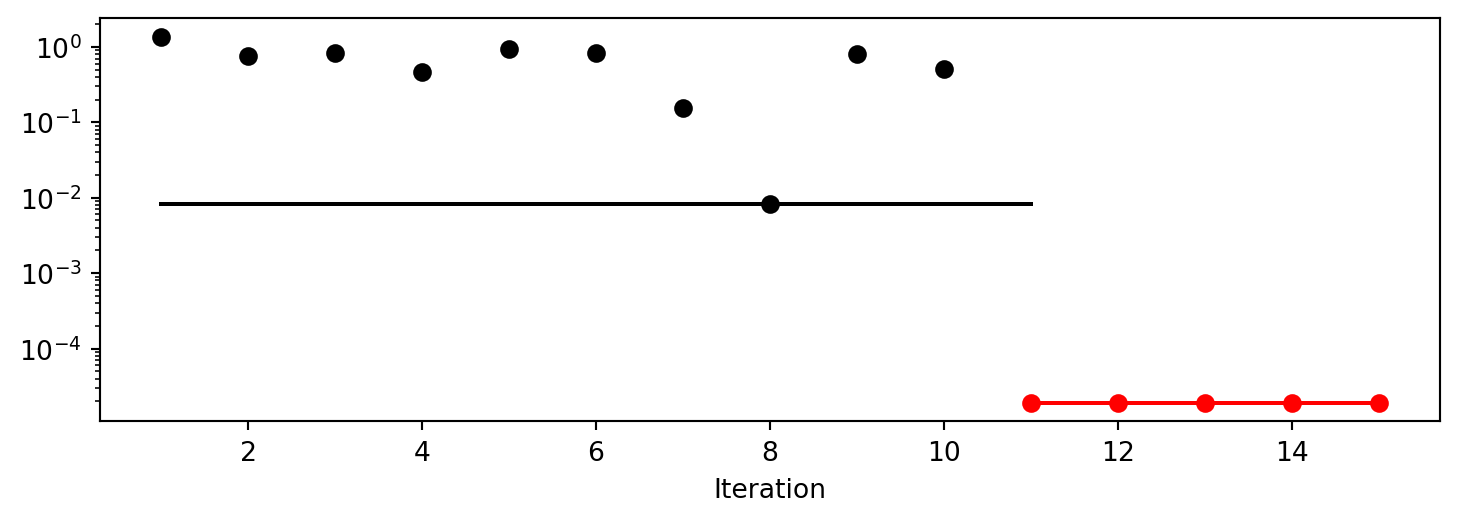

In [15]:
spot_2_pm.plot_progress(log_y=True)

In [16]:
spot_2_pm.print_results()

min y: 1.893023485380876e-05
x0: 0.0017549984724977892
x1: 0.003981232876300906


[['x0', 0.0017549984724977892], ['x1', 0.003981232876300906]]

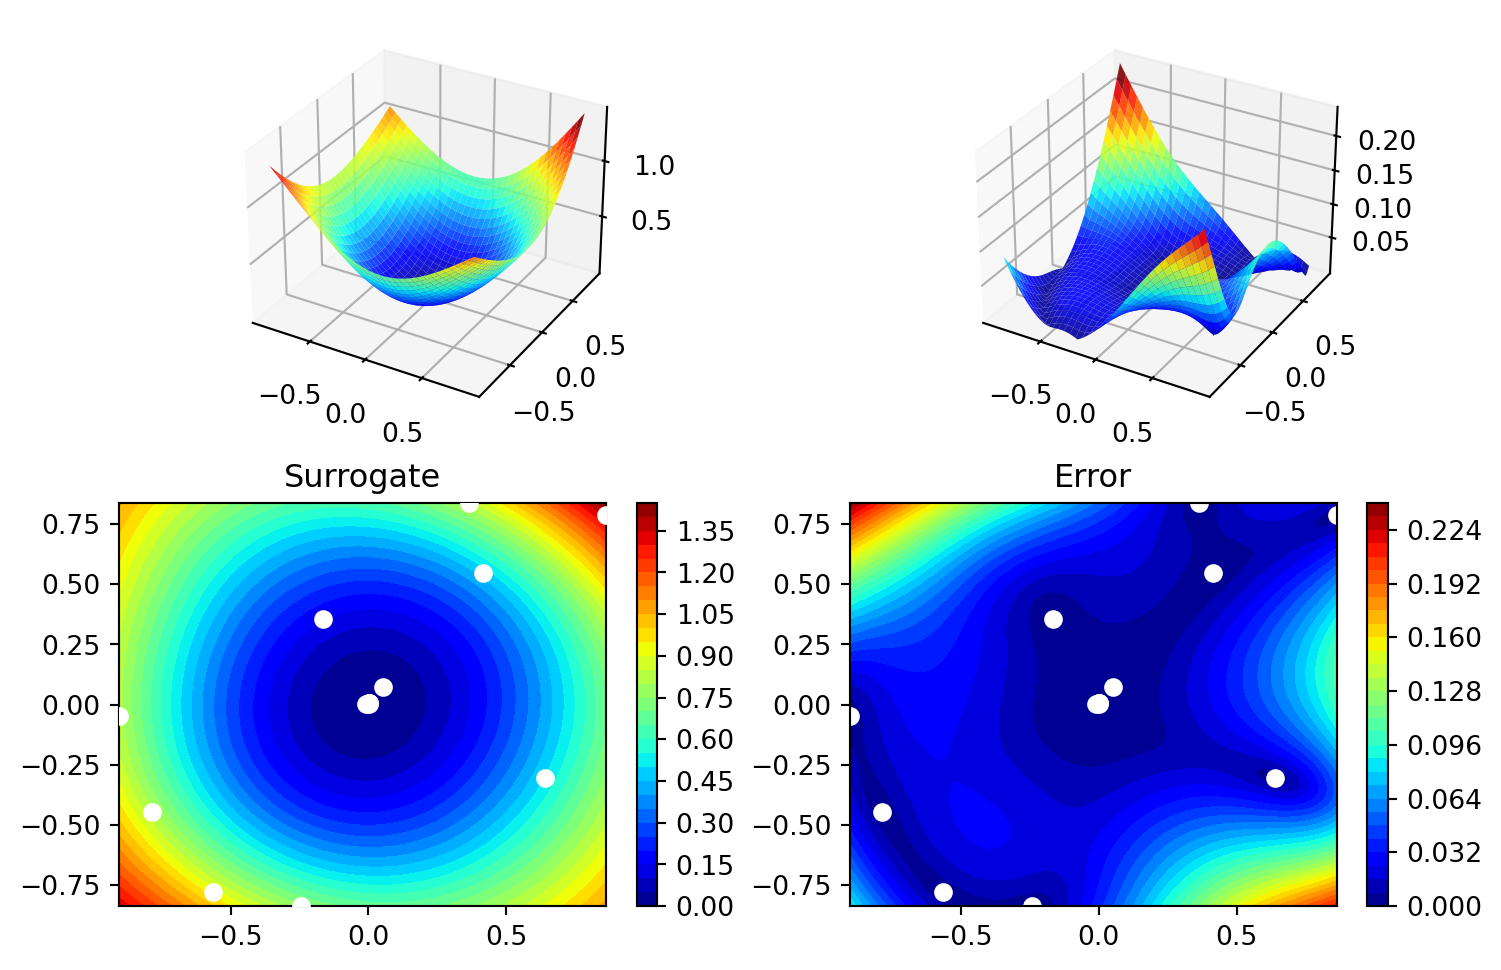

In [17]:
spot_2_pm.surrogate.plot()

In [18]:
spot_2_pm.surrogate.p

array([1.77398298])

## Optimization of Multiple `p` Values


In [19]:
surrogate_control = surrogate_control_init(n_p=2,
                                           optim_p=True)
spot_2_pmo= spot.Spot(fun=fun,
                    fun_control=fun_control,
                    surrogate_control=surrogate_control)
spot_2_pmo.run()

spotPython tuning: 2.162397189403005e-05 [#######---] 73.33% 


spotPython tuning: 2.162397189403005e-05 [########--] 80.00% 


spotPython tuning: 2.162397189403005e-05 [#########-] 86.67% 


spotPython tuning: 2.162397189403005e-05 [#########-] 93.33% 


spotPython tuning: 2.162397189403005e-05 [##########] 100.00% Done...



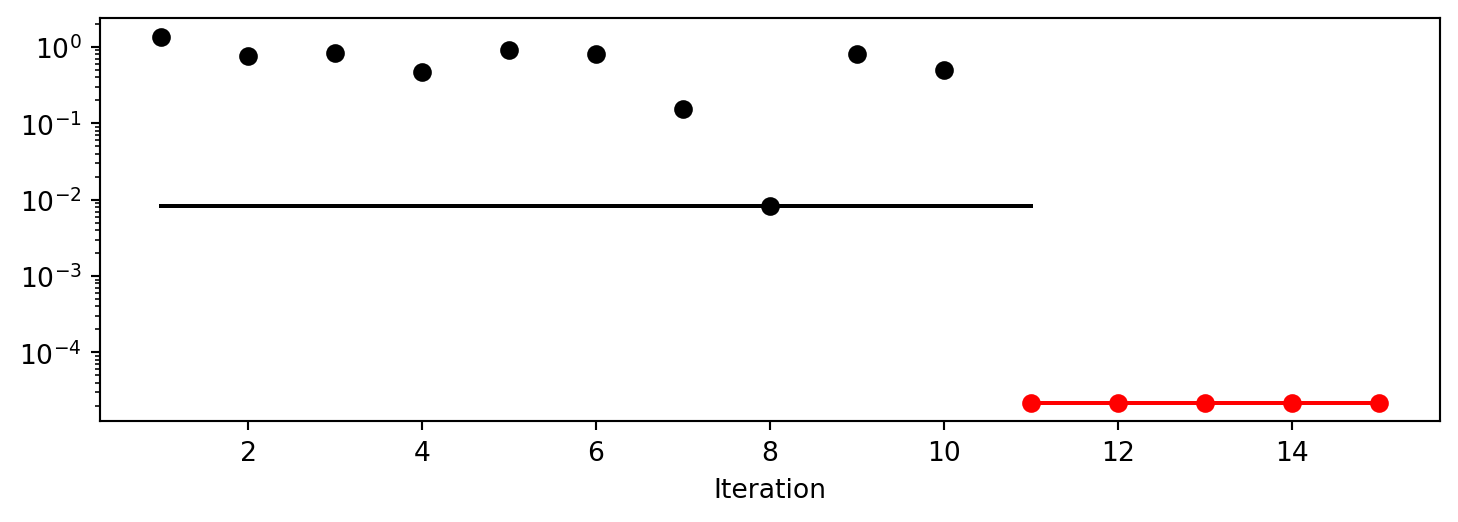

In [20]:
spot_2_pmo.plot_progress(log_y=True)

In [21]:
spot_2_pmo.print_results()

min y: 2.162397189403005e-05
x0: 0.0018245082309241386
x1: 0.00427728203527896


[['x0', 0.0018245082309241386], ['x1', 0.00427728203527896]]

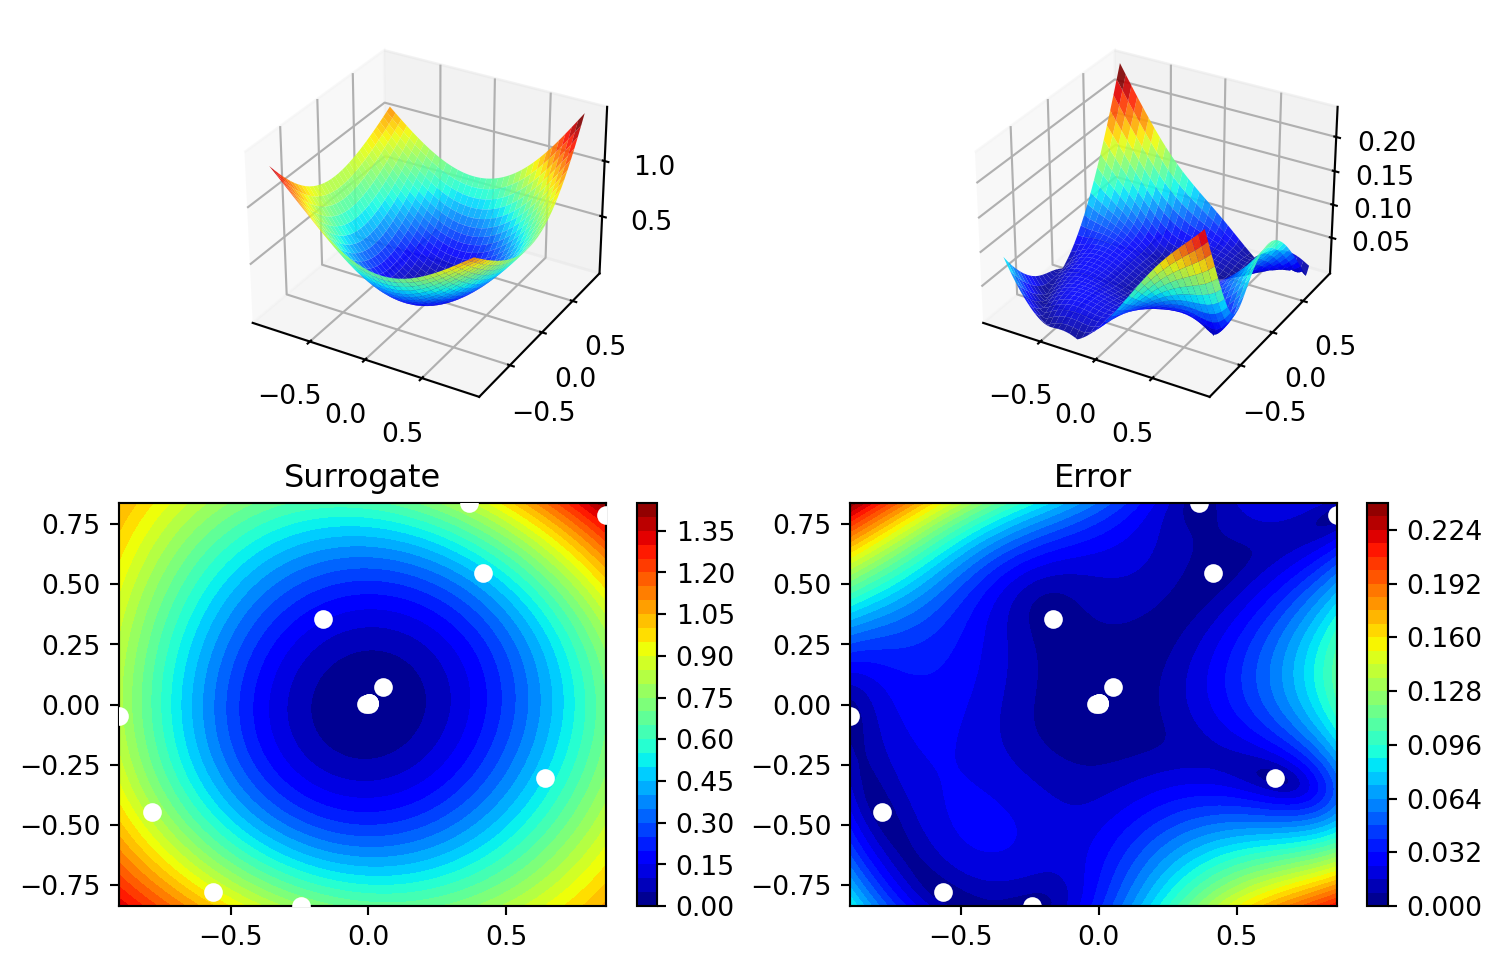

In [22]:
spot_2_pmo.surrogate.plot()

In [23]:
spot_2_pmo.surrogate.p

array([1.09037777, 1.76346322])

## Exercises


###  `fun_branin`

* Describe the function.
  * The input dimension is `2`. The search range is  $-5 \leq x_1 \leq 10$ and $0 \leq x_2 \leq 15$.
* Compare the results from `spotPython` runs with different options for `p`.
* Modify the termination criterion: instead of the number of evaluations (which is specified via `fun_evals`), the time should be used as the termination criterion. This can be done as follows (`max_time=1` specifies a run time of one minute):


In [24]:
fun_evals=inf,
max_time=1,

### `fun_sin_cos`

* Describe the function.
  *  The input dimension is `2`. The search range is  $-2\pi \leq x_1 \leq 2\pi$ and $-2\pi \leq x_2 \leq 2\pi$.
* Compare the results from `spotPython` run a) with isotropic and b) anisotropic surrogate models.
* Modify the termination criterion (`max_time` instead of `fun_evals`) as described for `fun_branin`.

###  `fun_runge`

* Describe the function.
  *  The input dimension is `2`. The search range is  $-5 \leq x_1 \leq 5$ and $-5 \leq x_2 \leq 5$.
* Compare the results from `spotPython` runs with different options for `p`.
* Modify the termination criterion (`max_time` instead of `fun_evals`) as described for `fun_branin`.

###  `fun_wingwt`

* Describe the function.
  *  The input dimension is `10`. The search ranges are between 0 and 1 (values are mapped internally to their natural bounds).
* Compare the results from `spotPython` runs with different options for `p`.
* Modify the termination criterion (`max_time` instead of `fun_evals`) as described for `fun_branin`.




## Jupyter Notebook

:::{.callout-note}

* The Jupyter-Notebook of this lecture is available on GitHub in the [Hyperparameter-Tuning-Cookbook Repository](https://github.com/sequential-parameter-optimization/Hyperparameter-Tuning-Cookbook/blob/main/015_num_spot_correlation_p.ipynb)

:::
